<div style="text-align: right; font-size: small;">DSC 530 Data Exploration and Analysis</div>

<div style="text-align: right; font-size: small;">Week 12</div>

<div style="text-align: right; font-size: small;">Jon Cannaday</div>


# <p style="text-align: center;">Movie Theater Data Exploration</p>

### Data
    - Imports

In [35]:
import pandas as pd # Will be used for data transformations.
import matplotlib.pyplot as plt # Will be used for plotting.
import numpy as np # Will be used for CDF

    - Connections

In [2]:
path = "C:/Users/Owner/OneDrive/Desktop/DataScience/2023_Winter_Statistics/"
file = 'Movie_Theater_Data.xlsx'
filepath = path + file
data = pd.read_excel(filepath)

    - Table shape

In [16]:
print(f'Data Shape: {data.shape}')
print(f'Dimensions: {data.ndim}')
print('We are looking at a 25 row by 60 column data set')
print('Structured in a 2 Dimensional set.')

Data Shape: (25, 60)
Dimensions: 2
We are looking at a 25 row by 60 column data set
Structured in a 2 Dimensional set.


    - Table view

In [17]:
print(data.columns)

Index(['TheaterNumber', 'MonthDate', 'OpenAttendance', 'PreOrderAttendance',
       'DateIsJanuary', 'DateIsFebuary', 'DateIsMarch', 'DateIsApril',
       'DateIsMay', 'DateIsJune', 'DateIsJuly', 'DateIsAugust',
       'DateIsSeptember', 'DateIsOctober', 'DateIsNovember', 'DateIsDecember',
       'DateIsSpring', 'DateIsSummer', 'DateIsFall', 'DateIsWinter',
       'DateIsWinter.1', 'DateIsNearNewYears', 'DateIsNearValentines',
       'DateIsNearEaster', 'DateIsNearStartOfSummer',
       'DateIsNearIndependanceDay', 'DateIsNearEndOfSummer',
       'DateIsNearHalloween', 'DateIsNearThanksGiving', 'DateIsNearChristmas',
       'MovieDiscoveryLength', 'MovieIsPassRestricted',
       'MovieIsAlternativeContent', 'MovieIsCineArts', 'MovieIsForeignMovie',
       'MovieIsR', 'MovieIsPG13', 'MovieIsPG', 'MovieIsG', 'MovieIsUnknown',
       'MovieHasLanguage', 'MovieHasViolence', 'MovieHasNudity',
       'MovieHasDrugs', 'MovieHasDistirbing', 'MovieHasCrude', 'MovieHasHumor',
       'MovieHasHor

### Feature Selection

    - Correlation Matrix Feature Selection

In [31]:
correlationmatrix = data.corr()
attendancecorrelation = correlationmatrix['OpenAttendance'].abs().sort_values(ascending=False)
dataheaders = attendancecorrelation.head(6).index[1:]
print(attendancecorrelation.head(6))
print('')
print('We took all of the correlations in relation to OpenAttendance and selected the top 5 correlated variables.')
print('Could take the absolute value then select those but for now we will go witht the first option.')
print()
print()

print(f'The selected column headers will be {dataheaders}.')

OpenAttendance               1.000000
PreOrderAttendance           0.767978
MovieHasAction               0.678316
DateIsNearIndependanceDay    0.664296
DateIsNearStartOfSummer      0.598155
DateIsJune                   0.596634
Name: OpenAttendance, dtype: float64

We took all of the correlations in relation to OpenAttendance and selected the top 5 correlated variables.
Could take the absolute value then select those but for now we will go witht the first option.


The selected column headers will be Index(['PreOrderAttendance', 'MovieHasAction', 'DateIsNearIndependanceDay',
       'DateIsNearStartOfSummer', 'DateIsJune'],
      dtype='object').


### Feature Descriptions and Plots

    - Automated Feature Descriptions and histograms.

count       25.000000
mean     18015.640000
std       7629.802782
min       7759.000000
25%      12360.000000
50%      18220.000000
75%      21001.000000
max      43045.000000
Name: PreOrderAttendance, dtype: float64


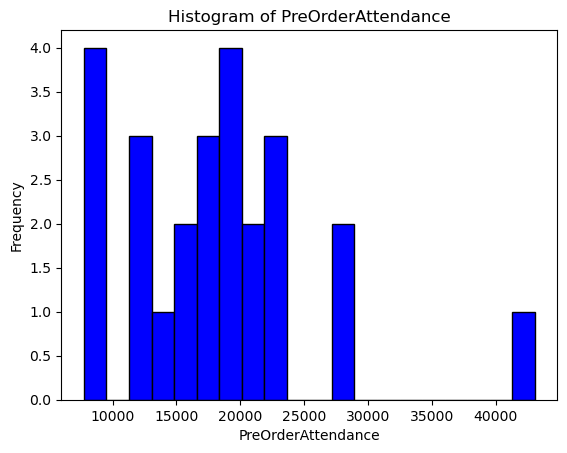

count    25.000000
mean      8.360000
std       6.264184
min       0.000000
25%       4.000000
50%       8.000000
75%      11.000000
max      24.000000
Name: MovieHasAction, dtype: float64


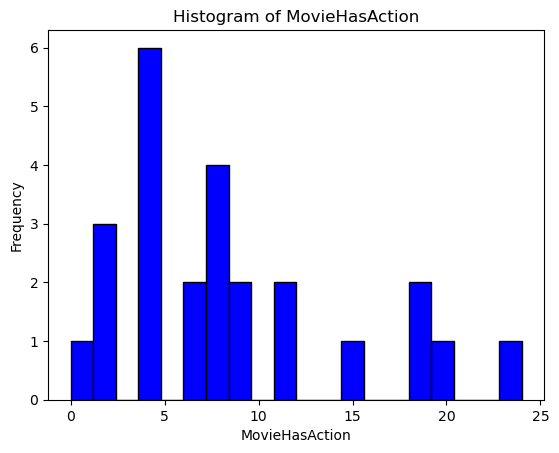

count    25.000000
mean      3.600000
std       9.055385
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      36.000000
Name: DateIsNearIndependanceDay, dtype: float64


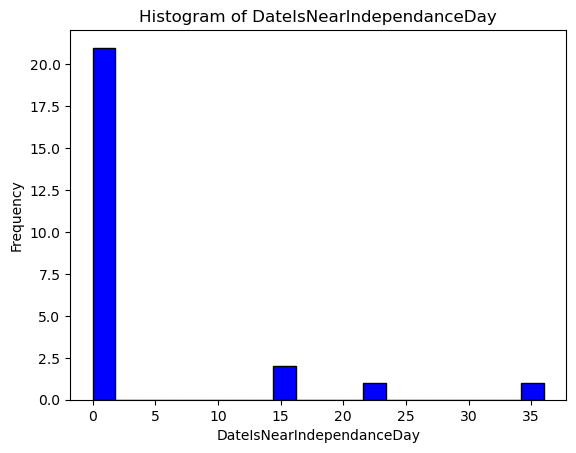

count    25.000000
mean      3.240000
std      11.214871
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      41.000000
Name: DateIsNearStartOfSummer, dtype: float64


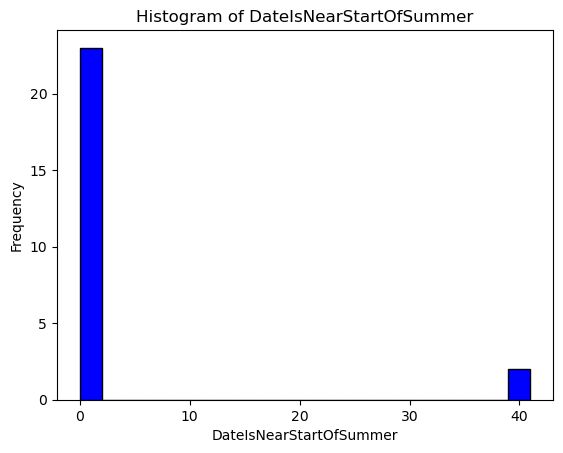

count    25.000000
mean      7.760000
std      26.859635
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      98.000000
Name: DateIsJune, dtype: float64


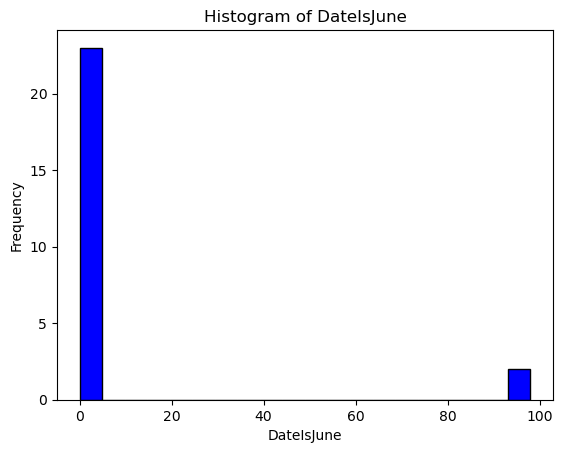

In [32]:
# Header Contents
for eachname in dataheaders:
    print(data[eachname].describe())
# And plot the histogram for each name
    plt.hist(data[eachname], bins=20, color='blue', edgecolor='black')
    plt.xlabel(eachname)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + eachname)
    plt.show()

I will have to generalize the column names to their assigned categorical naming convention.
each prefix of the name will indicate which category it belongs to. This is set up this way to be able to dynamically call the columns associated with the category you want to work with.

For PreOrder Attendance- It looks like a Bi-Modal Histogram. Outliers in both extreems. We need to find the corresponding movies that are associated with the left most outlier and for the right most place a lower weight on them because those represent movies that do very well.


Identification:
Theater Number: Identifies the unique number assigned to each theater.
Movie Title: Represents the name of the movie being analyzed.
Release Date: Denotes the date when the movie was released.

Movie Attributes:
HasViolence: Binary indicator for the presence of violent scenes in the movie.
HasAdventure: Binary indicator for the presence of adventure elements in the movie.
HasLanguage: Binary indicator for the inclusion of explicit language in the movie.

Date Attributes:
IsSummer: Binary indicator for whether the date falls within the summer season.
IsNearHalloween: Binary indicator for whether the date is in proximity to Halloween.
IsNearChristmas: Binary indicator for whether the date is in proximity to Christmas.
IsNearIndependenceDay: Binary indicator for whether the date is near Independence Day.
IsNearStartOfSummer: Binary indicator for whether the date is close to the start of the summer season.
IsJune: Binary indicator for whether the date is in the month of June.

Customer Attributes:
HasMembership: Binary indicator for customers with a membership.
HasHighIncome: Binary indicator for customers with high income.
IsWhite: Binary indicator for customers identified as White.

Location Attributes:
NearSchool: Binary indicator for theaters located near schools.
NearMall: Binary indicator for theaters located near malls.
NearOtherTheater: Binary indicator for theaters located near other theaters.

### PMF

    - Set up Different compressions.

In [33]:
# PMF Scenarios
scenario1 = data['MovieIsG']
scenario2 = data['MovieIsPG13']
scenario3 = data['MovieIsR']

print('We will be grouping the data into thier ratings for analysis.')

We will be grouping the data into thier ratings for analysis.


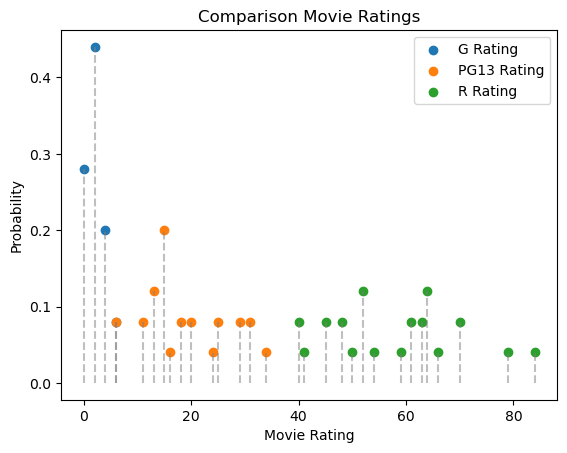

In [34]:
# PMF Values
pmf_scenario1 = scenario1.value_counts(normalize=True).sort_index()
pmf_scenario2 = scenario2.value_counts(normalize=True).sort_index()
pmf_scenario3 = scenario3.value_counts(normalize=True).sort_index()

# PMF Plot
plt.scatter(pmf_scenario1.index, pmf_scenario1.values, label='G Rating', marker='o')
plt.scatter(pmf_scenario2.index, pmf_scenario2.values, label='PG13 Rating', marker='o')
plt.scatter(pmf_scenario3.index, pmf_scenario3.values, label='R Rating', marker='o')

# PMF Plot lines
for x, y in zip(pmf_scenario1.index, pmf_scenario1.values):
    plt.vlines(x, 0, y, linestyle='dashed', color='gray', alpha=0.5)
for x, y in zip(pmf_scenario2.index, pmf_scenario2.values):
    plt.vlines(x, 0, y, linestyle='dashed', color='gray', alpha=0.5)
for x, y in zip(pmf_scenario3.index, pmf_scenario3.values):  # Corrected line
    plt.vlines(x, 0, y, linestyle='dashed', color='gray', alpha=0.5)    

# PMF Labels
plt.xlabel('Movie Rating')
plt.ylabel('Probability')
plt.title('Comparison Movie Ratings')
plt.legend()

# Display
plt.show()

Here we can see the different probabilitys of the categories over time.

### CDF

    - Assign and plot CDF.

In [38]:
# CDF Variables
cdfvariable = data['PreOrderAttendance']
cdfvalues = np.linspace(0, 1, len(cdfvariable))
cdfvariablesorted = np.sort(cdfvariable)

print(cdfvariablesorted)

[ 7759  8031  8765  8838 12041 12111 12360 13959 15100 16223 17072 17102
 18220 18408 18449 18826 19571 20365 21001 22177 23029 23050 27317 27572
 43045]


CDF helps us understand the probability of observing a particular attendance level or less.
The x-axis represents different attendance values, sorted in ascending order.
The y-axis represents the cumulative probability, indicating the likelihood of observing an attendance value less than or equal to the corresponding x-axis value.

### Analytical Distribution

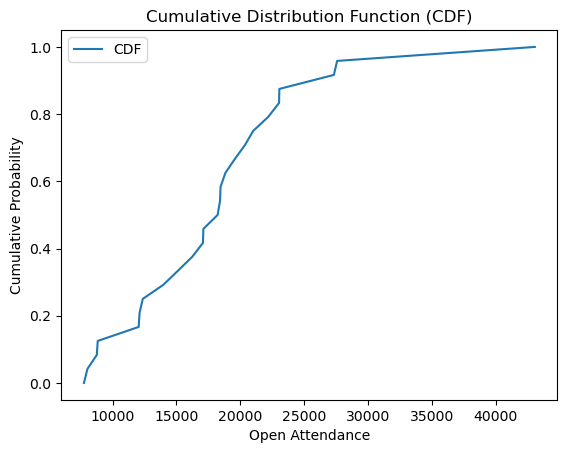

In [39]:
#CDF Plot
plt.plot(cdfvariablesorted, cdfvalues, label='CDF')

# CDF Lables
plt.xlabel('Open Attendance')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

# Display
plt.show()

### Scatter Plots

    - Scatter variables

In [45]:
varpreorder = data['PreOrderAttendance']
varopen = data['OpenAttendance']
varaction = data['MovieHasAction']


    - Pre Order and Open Attendance

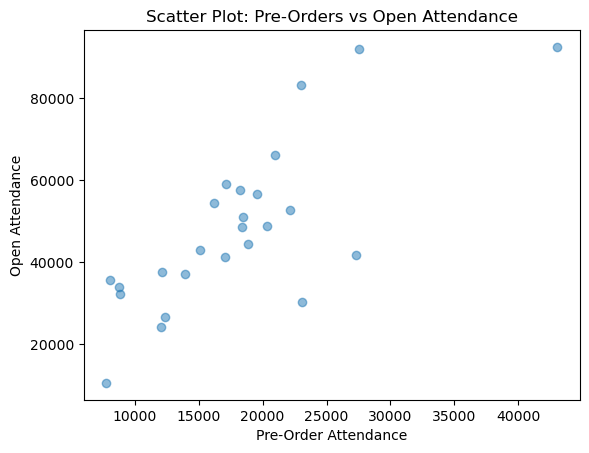

In [43]:
# Scatter Plot
plt.scatter(varpreorder, varopen, alpha=0.5)

# Scatter Lables
plt.xlabel('Pre-Order Attendance')
plt.ylabel('Open Attendance')
plt.title('Scatter Plot: Pre-Orders vs Open Attendance')

# Display
plt.show()

Looks like a fairly strong positive sloping trend between these variables.

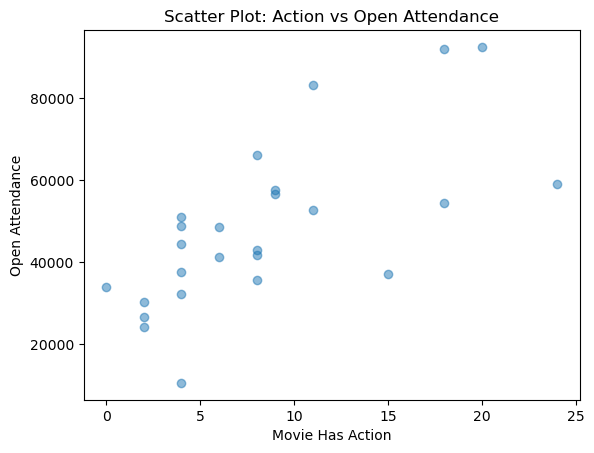

In [46]:

# Scatter Plot
plt.scatter(varaction, varopen, alpha=0.5)

# Scatter Labels
plt.xlabel('Movie Has Action')
plt.ylabel('Open Attendance')
plt.title('Scatter Plot: Action vs Open Attendance')

# Display
plt.show()

Looks like a fairly weak positive sloping trend between these variables.

### Hypothesis

In [47]:
observed = np.corrcoef(data['PreOrderAttendance'], data['OpenAttendance'])[0, 1]
permutations = 1000
permuted = np.zeros(permutations)

for i in range(permutations):
    preorder = np.random.permutation(data['PreOrderAttendance'])
    correlation = np.corrcoef(preorder, data['OpenAttendance'])[0, 1]
    permuted[i] = correlation
pvalue = np.sum(permuted >= observed) / permutations


print(f"Observed correlation: {observed}")
print(f"P-value: {pvalue}")

Observed correlation: 0.7679784464710552
P-value: 0.0


Simulated permutations, none of the permuted correlations were as extreme as the observed correlation. This suggests that the correlation between pre-order attendance and open attendance is statistically significant, and we reject the null hypothesis that there is no correlation between these two variables.

### Regression

    - Linear Regression

In [49]:
# Variables
X = data['PreOrderAttendance'].values
y = data['OpenAttendance'].values

# Constant
X = np.column_stack((np.ones_like(X), X))

# Linear regression
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

# Coefficients
intercept, slope = coefficients
print(f'Intercept: {intercept}, Slope: {slope}')

# Predictions
predictions = X @ coefficients

# Results
results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
print(results.head())

Intercept: 11871.688246624162, Slope: 2.008056985673328
   Actual     Predicted
0   24233  36050.702411
1   44450  49675.369059
2   41262  46153.237106
3   26682  36691.272590
4   35503  27998.393899


### Summary

Introduction:
This summary serves as a comprehensive guide through the intricate process and challenges involved in crafting
a Data Science model. It navigates through the evolution of a problem, rummages into data engineering
methods, and comes to a climax in the generation of model predictions. Laced throughout the account are
reflections and considerations, addressing insights gained and potential modifications.
The integration of Data Science methodologies can prove invaluable for theaters, offering insights for budget-
ing hours, conducting market research, and refining pricing strategies. Traditionally reliant on managerial
intuition, data science opens avenues for informed decision-making based on data and mathematical models.

Problem Statement:
Originating from the need to forecast attendance for upcoming movies, the model’s reach goes beyond
attendance predictions. The emphasis on predicting differing outcomes emphasizes its utility in assisting
strategic decisions. Within the movie industry, this predictive capacity enhances the precision of budgeting
employee hours.

Problem Addressed:
The problem is addressed by firstly, unpacking the underlying reason held by each record within a table.
These were identified by HASH values made up of theater, movie ID, and print ID for the movie dimension.
Transaction-level fact tables provide the foundation for attendance derivation. Addressing challenges, such
as incorrect date entries, involves creative solutions, like leveraging showtime tables to construct makeshift
movie tables with accurate release dates.
Highlighting the objectivity of data is pivotal, stressing the alignment with reality. Each record mirrors a
real-life interaction, and the data aims to objectively represent these interactions, forming the bedrock for
decision-making.
Aggregating data to a consistent level of detail posed challenges, met with the utilization of SQL Common
Table Expressions (CTEs). These expressions group each table to a specific detail level, close to finding
the greatest common denominator in mathematics. Opting for the highest data view facilitates grouping by
attributes such as location, date, movie, and customer.
The data flow is designed for minimal change effort, with provisions for easy column addition and dynamic
column categorization in Python. Variables and a for loop ensure a cohesive approach, allowing the model
to seamlessly adapt to changing experimental variables.

Analysis:
The exploration starts with Exploratory Data Analysis (EDA), searching each table for insights into records
and data generation. The linking of data using keys, exploration of frequency tables, histograms, and
descriptive statistics, and leveraging scatter plots and correlations aid in feature selection. Slicing and dicing
the data involved changing aggregation levels, experimenting, and applying models at varying granularity,
such as theaters, dates, and movie genres

Implications:
Identifying a high correlation between presales and opening weeks attendance per movie has operational im-
plications for theater managers, influencing staffing decisions. A brief exploration of a 3D correlation matrix
concludes that two-dimensional correlations suffice. The organization gains insights into data operations and
their broader implications.
Limitations:
Limitations include the reliance on data from a single theater, warranting future iterations including the entire
country. The unavailability of external transaction-level data and additional features like GPS API-based
location specifics and astrological dates is acknowledged. Certain information, like the need for additional
features using an API and implied logic in release dates, is not self-evident.

Conclusion:
In conclusion, the data exhibits linear trends, particularly in presales and opening weeks sales. The data
engineering framework proves adaptable to diverse business angles and experimental trends, showcasing
presales as reliable indicators of opening attendance. This information serves stakeholders for informed
decision-making. Following initial regressions, the plan is to further dissect the data, experiment with
different methods, and include more features to enhance the model. Continuous improvement and exploration
of various analytical methods are central to a comprehensive analysis.